In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')


In [2]:
items = []
with open("D:/Data Secience/Assignment/Association Rules/groceries.csv") as f:
     items = f.read()

In [3]:
#splitting the data into separate transactions using separator as "\n"
items = items.split("\n")
items_list = []
for i in items:
    items_list.append(i.split(","))

In [4]:
items

['citrus fruit,semi-finished bread,margarine,ready soups',
 'tropical fruit,yogurt,coffee',
 'whole milk',
 'pip fruit,yogurt,cream cheese ,meat spreads',
 'other vegetables,whole milk,condensed milk,long life bakery product',
 'whole milk,butter,yogurt,rice,abrasive cleaner',
 'rolls/buns',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)',
 'pot plants',
 'whole milk,cereals',
 'tropical fruit,other vegetables,white bread,bottled water,chocolate',
 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes',
 'beef',
 'frankfurter,rolls/buns,soda',
 'chicken,tropical fruit',
 'butter,sugar,fruit/vegetable juice,newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk,pastry',
 'whole milk',
 'tropical fruit,cream cheese ,processed cheese,detergent,newspapers',
 'tropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,sal

In [5]:
item_list=items

In [6]:
te = TransactionEncoder()
te_ary = te.fit(items_list).transform(items_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9834,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


 ## Apriori Algorithm

In [7]:
# apriori(df, min_support=0.4, use_colnames=Ture)

In [8]:
frequent_itemsets=apriori(df,min_support=0.02, use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.033449,(UHT-milk),1
1,0.052460,(beef),1
2,0.033245,(berries),1
3,0.026027,(beverages),1
4,0.080521,(bottled beer),1
...,...,...,...
117,0.032229,"(whole milk, whipped/sour cream)",2
118,0.020740,"(yogurt, whipped/sour cream)",2
119,0.056019,"(yogurt, whole milk)",2
120,0.023180,"(root vegetables, other vegetables, whole milk)",3


In [9]:
rules= association_rules(frequent_itemsets, min_threshold=0.3)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(whole milk),0.052460,0.255490,0.021248,0.405039,1.585341,0.007845,1.251359
1,(bottled water),(whole milk),0.110512,0.255490,0.034364,0.310948,1.217063,0.006129,1.080484
2,(brown bread),(whole milk),0.064864,0.255490,0.025214,0.388715,1.521448,0.008641,1.217942
3,(butter),(other vegetables),0.055409,0.193473,0.020028,0.361468,1.868312,0.009308,1.263096
4,(butter),(whole milk),0.055409,0.255490,0.027552,0.497248,1.946251,0.013395,1.480868


In [10]:
rules[(rules['lift']>=0.1)&
       (rules['confidence']>=0.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(whole milk),0.052460,0.255490,0.021248,0.405039,1.585341,0.007845,1.251359
4,(butter),(whole milk),0.055409,0.255490,0.027552,0.497248,1.946251,0.013395,1.480868
7,(curd),(whole milk),0.053274,0.255490,0.026129,0.490458,1.919676,0.012518,1.461136
9,(domestic eggs),(whole milk),0.063440,0.255490,0.029992,0.472756,1.850391,0.013783,1.412080
11,(frozen vegetables),(whole milk),0.048089,0.255490,0.020435,0.424947,1.663263,0.008149,1.294681
13,(margarine),(whole milk),0.058560,0.255490,0.024197,0.413194,1.617262,0.009235,1.268751
17,(root vegetables),(other vegetables),0.108987,0.193473,0.047377,0.434701,2.246833,0.026291,1.426728
19,(whipped/sour cream),(other vegetables),0.071675,0.193473,0.028874,0.402837,2.082135,0.015006,1.350598
27,(root vegetables),(whole milk),0.108987,0.255490,0.048902,0.448694,1.756210,0.021057,1.350448
29,(tropical fruit),(whole milk),0.104921,0.255490,0.042294,0.403101,1.577755,0.015487,1.247296


 ## Visualization

In [11]:
import networkx as nx

 ## NetworkX Visualization

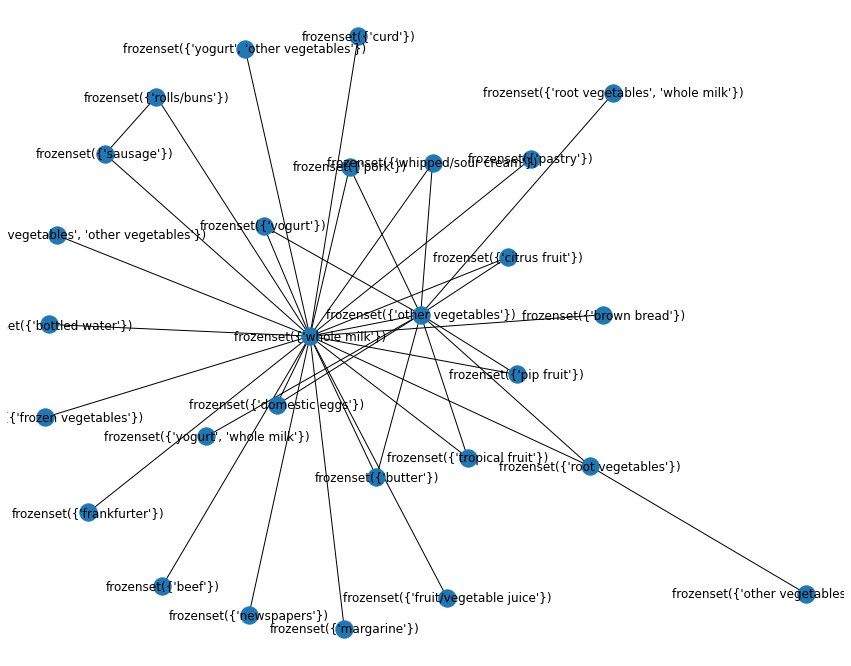

In [12]:
fig, ax=plt.subplots(figsize=(15,12))
GA=nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

 ## Support vs Confidence

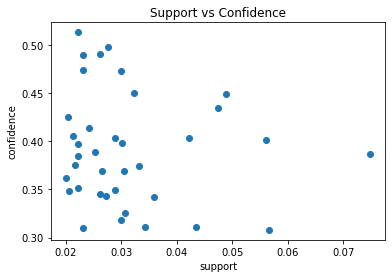

In [13]:
plt.scatter(rules['support'], rules['confidence'], alpha=1)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

 ## Support vs Lift

<function matplotlib.pyplot.show(close=None, block=None)>

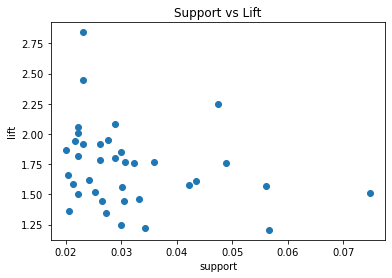

In [14]:
plt.scatter(rules['support'], rules['lift'], alpha=1)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show

 ## Lift vs Confidence

Text(0.5, 1.0, 'Lift vs Confidence')

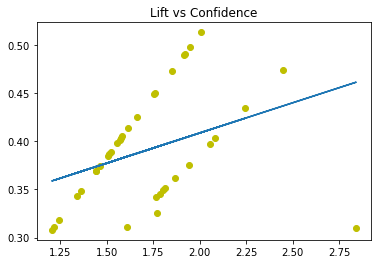

In [15]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))
plt.title('Lift vs Confidence')